In [14]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np


img = cv.imread('../images/imori.jpg').astype(np.uint8)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [15]:
# Q26
img.shape
new_img = np.zeros((np.int(img.shape[0]*1.5), np.int(img.shape[1]*1.5), img.shape[2]))
new_img.shape
# 这里由于在取边缘像素的邻域时会取到边界外（127 +1 = 128 > 127）， 所以对原图做一个 zero padding
img_rgb = np.concatenate([img_rgb, np.zeros((img_rgb.shape[0], 1, 3))], 1)
img_rgb = np.concatenate([img_rgb, np.zeros((1, img_rgb.shape[1], 3))], 0)
img_rgb.shape

(129, 129, 3)

In [16]:
for i in range(img.shape[2]):
    for m in range(new_img.shape[0]):
        for n in range(new_img.shape[1]):
            ori_pos = np.array([m / 1.5, n / 1.5])  # 计算当前像素对应到原图的位置
            
            # 求原位置4邻域的像素位置
            neighbour_pix1 = np.cast[np.int](np.floor(ori_pos))
            neighbour_pix2 = [neighbour_pix1[0] + 1, neighbour_pix1[1]]
            neighbour_pix3 = [neighbour_pix1[0], neighbour_pix1[1] + 1]
            neighbour_pix4 = [neighbour_pix1[0] + 1, neighbour_pix1[1] + 1]
            
            # 求权重，正比于邻域像素到原位置的距离（二范数正好对应距离）
            weight1 = np.linalg.norm(np.subtract(ori_pos, neighbour_pix1), 2)
            weight2 = np.linalg.norm(np.subtract(ori_pos, neighbour_pix2), 2)
            weight3 = np.linalg.norm(np.subtract(ori_pos, neighbour_pix3), 2)
            weight4 = np.linalg.norm(np.subtract(ori_pos, neighbour_pix4), 2)
            sum_weight = weight1 + weight2 + weight3 + weight4
            
            # 权重归一化
            weight1 = weight1 / sum_weight
            weight2 = weight2 / sum_weight
            weight3 = weight3 / sum_weight
            weight4 = weight4 / sum_weight
            
            new_img[m, n, i] = img_rgb[np.concatenate((neighbour_pix1, [i]), 0)[0],
                                       np.concatenate((neighbour_pix1, [i]), 0)[1],
                                       np.concatenate((neighbour_pix1, [i]), 0)[2]] * weight1 + \
                               img_rgb[np.concatenate((neighbour_pix2, [i]), 0)[0],
                                       np.concatenate((neighbour_pix2, [i]), 0)[1],
                                       np.concatenate((neighbour_pix2, [i]), 0)[2]] * weight2 + \
                               img_rgb[np.concatenate((neighbour_pix3, [i]), 0)[0],
                                       np.concatenate((neighbour_pix3, [i]), 0)[1],
                                       np.concatenate((neighbour_pix3, [i]), 0)[2]] * weight3 + \
                               img_rgb[np.concatenate((neighbour_pix4, [i]), 0)[0],
                                       np.concatenate((neighbour_pix4, [i]), 0)[1],
                                       np.concatenate((neighbour_pix4, [i]), 0)[2]] * weight4
        
    

(129, 129, 3)
(192, 192, 3)


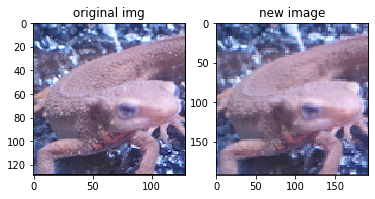

In [17]:
print(img_rgb.shape)
print(new_img.shape)

plt.figure
plt.subplot(121)
plt.imshow(img_rgb.astype('uint8'))
plt.title('original img')
plt.subplot(122)
plt.imshow(new_img.astype('uint8'))
plt.title('new image')

plt.show()

In [18]:
# Q27
img = cv.imread('../images/imori.jpg').astype(np.uint8)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

resize_h = np.cast[np.int](1.5 * img_rgb.shape[0])
resize_w = np.cast[np.int](1.5 * img_rgb.shape[1])

In [21]:
# 使用opencv自带的resize函数会快很多……
img_resize = cv.resize(img_rgb, (resize_h, resize_w), interpolation=cv.INTER_CUBIC)
img_resize.shape

(192, 192, 3)

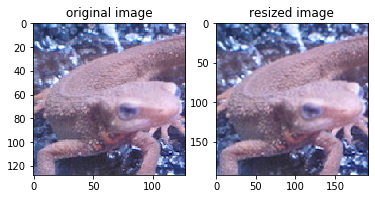

In [20]:
plt.figure
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('original image')
plt.subplot(122)
plt.imshow(img_resize)
plt.title('resized image')

plt.show()

In [31]:
# Q28
# 构建平移矩阵
translate = np.float32([[1, 0, 30], [0, 1, -30]]) # 这里注意warpAfine函数只接受float型的输入，所以要把转移矩阵设置成float32

img_translate = cv.warpAffine(img_rgb, translate, (img_rgb.shape[0], img_rgb.shape[1]))

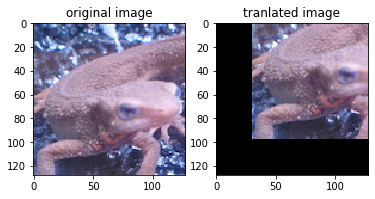

In [32]:
plt.figure
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('original image')
plt.subplot(122)
plt.imshow(img_translate)
plt.title('tranlated image')

plt.show()

In [47]:
# Q29
# 缩放操作仍可以用resize
resize_w = np.cast[np.int](img_rgb.shape[1] * 1.3)
resize_h = np.cast[np.int](img_rgb.shape[0] * 0.8)
img_resize = cv.resize(img_rgb, (resize_w, resize_h))

# 再做平移
translate = np.float32([[1, 0, 30], [0, 1, -30]])
img_resize_trans = cv.warpAffine(img_resize, translate, (img_resize.shape[1], img_resize.shape[0]))

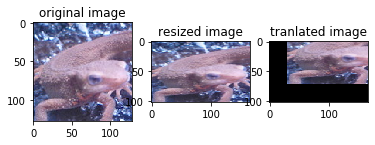

In [48]:
plt.figure
plt.subplot(131)
plt.imshow(img_rgb)
plt.title('original image')
plt.subplot(132)
plt.imshow(img_resize)
plt.title('resized image')
plt.subplot(133)
plt.imshow(img_resize_trans)
plt.title('tranlated image')

plt.show()

In [57]:
# Q30
rotation = cv.getRotationMatrix2D((img_rgb.shape[1]/2, img_rgb.shape[0]/2), 30, 2)
img_rotate = cv.warpAffine(img_rgb, rotation, (img_rgb.shape[1], img_rgb.shape[0]))

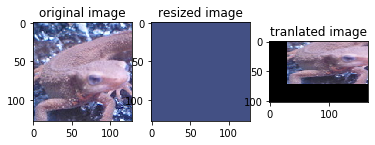

In [56]:
plt.figure
plt.subplot(131)
plt.imshow(img_rgb)
plt.title('original image')
plt.subplot(132)
plt.imshow(img_rotate)
plt.title('resized image')
plt.subplot(133)
plt.imshow(img_resize_trans)
plt.title('tranlated image')

plt.show()